In [16]:
import numpy as np
import scipy.signal as signal
import plotly.express as px
import pandas as pd # pour les dataframes
import sounddevice as sd # pour jouer les sons associés aux signaux
import pandas as pd
from matplotlib import pyplot as plt

# 1 Analyse de l’évolution de la distance Terre-Lune
Un centre de recherche en astronomie a mesuré la distance Terre-Lune (en km), tous les jours de 2011 à 2016. Nous
souhaitons ici caractériser les propriétés de ce phénomène physique grâce à une analyse spectrale.
## 1.1 Chargement et affichage des données
1. Charger les données stockées dans le fichier distance_earth_moon_2011.npz, grâce à la commande
suivante :
 - data = np.load("distance_earth_moon_2011.npz")
 - distances = data['distances']
2. Calculer la distance Terre-Lune moyenne.
3. Afficher l’évolution de la distance Terre-Lune en fonction des jours.

Nombre d'échantillons K : 2192
Distance Terre-Lune moyenne ≈ 385072.98540145985 km


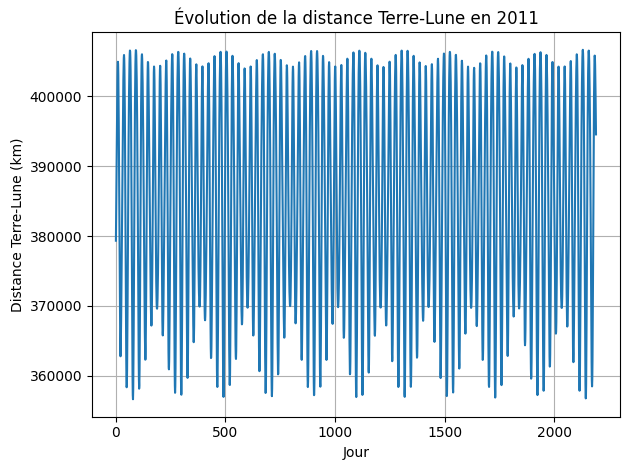

In [17]:
data = np.load("data/distance_earth_moon_2011.npz")
distances = data['distances']
K = len(distances)                  # nombre de points temporels
print("Nombre d'échantillons K :", K)

# 2) Calculer la distance Terre–Lune moyenne
mean_distance = np.mean(distances)
print("Distance Terre-Lune moyenne ≈", mean_distance, "km")

# 3) Afficher l’évolution de la distance Terre–Lune en fonction des jours
jours = np.arange(K)   # un échantillon par jour

plt.figure()
plt.plot(jours, distances)
plt.xlabel("Jour")
plt.ylabel("Distance Terre-Lune (km)")
plt.title("Évolution de la distance Terre-Lune en 2011")
plt.grid(True)
plt.tight_layout()
plt.show()

# 1.2 Analyse fréquentielle
1. Sachant que l’unité du signal temporel est le jour, en quelle unité l’axe fréquentiel sera t-il exprimé ?
--> Le jour étant l'unité de temps, l'axe fréquentiel sera exprimé en cycles par jour.

2. Afficher le spectre 4K-points du signal étudié sur l’intervalle de fréquences positives uniquement (K représente
le nombre de points du signal temporel). Justifier l’emplacement et l’amplitude du pic principal et proposer une
méthode pour l’éliminer.
--> Le pic principal du spectre correspond à la fréquence fondamentale du signal.

3. Afficher le spectre 4K-points en échelle logarithmique du signal une fois le pic principal retiré. Relever les fré-
quences correspondant aux pics d’amplitude observés.
4. Refaire la même analyse en fenêtrant au préalable le signal temporel avec une fenêtre de votre choix, en fonction
des observations faites lors de la séance précédente. Justifier vote choix de fenêtre et conclure sur l’intérêt du
fenêtrage dans ce contexte.
5. Après avoir déterminé la fréquence maximale correspondant au dernier pic d’amplitude significative, déduire la
fréquence d’échantillonnage qui aurait pu être utilisée pour étudier ce phénomène sans repliement spectral.
6. Déterminer à partir des pics observés les caractéristiques de l’évolution de la distance Terre-Lune.

In [42]:
data = np.load("data/distance_earth_moon_2011.npz")
distances = data['distances']
K = len(distances)  
N = 4*K  # nombre d'échantillons pour une année

nue = 1  # fréquence d'échantillonnage en cycles par jour
n = np.arange(N)
f = n/N-1/2
nu = f*nue

fig2 = px.line( y=distances, 
               title='distances', 
               labels={'x': 'jours', 'y': 'dist'}).show()

S = np.fft.fft(distances, N)

fig2 = px.line(x = nu, y=abs(S), 
               title='spectre 4K-points du signal ', 
               labels={'x': 'freq', 'y': 'dist'}).show()

s = distances-mean_distance #permet de retirer le signal principal
S = np.fft.fft(s, N)
log10 = np.log(S) 
norm = log10/max(log10) # permet au spectre d'avoir pour valeur max 1

fig2 = px.line(x=nu, y=abs(S), 
               title='Spectre de la distance terre-lune', 
               labels={'x': 'Fréquence cycle/jour', 'y': 'Amplitude'}).show()

4. Refaire la même analyse en fenêtrant au préalable le signal temporel avec une fenêtre de votre choix, en fonction
des observations faites lors de la séance précédente. Justifier vote choix de fenêtre et conclure sur l’intérêt du
fenêtrage dans ce contexte.

- la fennetre de Hanning est choisie pour son efficacité à réduire les effets de fuite spectrale.
- La fennetre rectangulaire est la moins efficace pour réduire les effets de fuite spectrale, car elle n'atténue pas les discontinuités aux bords du signal.

In [45]:
wH = signal.windows.hann(K)
sH = distances*wH # application de la fenetre de Hann

fft_sH = np.fft.fftshift(np.fft.fft(sH, N))

fig2 = px.line(x=nu, y=abs(fft_sH), 
               title='Spectre centré de sH: fenetre de Hann', 
               labels={'x': 'Fréquence (Hz)', 'y': 'Amplitude'}).show()

5. Après avoir déterminé la fréquence maximale correspondant au dernier pic d’amplitude significative, déduire la
fréquence d’échantillonnage qui aurait pu être utilisée pour étudier ce phénomène sans repliement spectral.
--> condition de Shannon : fe > 2*fmax, ici, 